<a href="https://colab.research.google.com/github/190031319PHemanthBhargav/machine-learning-projects/blob/main/emotion_detection_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2021-10-20 06:02:29--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2021-10-20 06:02:29--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ee102ef48de6896cb24a60069.dl.dropboxusercontent.com/cd/0/inline/BYYqOGXGK6bRk-2jzqPKgHBrYCXBLGVWUdps_MAGvyYrW0hd1ygL9HyFnXFDAq_U-KwjRymk_iGQteljkE2oKFhcRpLjsYD1CrM8VfdUsoWYmpXmzXxKlMetpfVGbJN0-RIoLpkaTYq3wlmmmSfQxZOk/file# [following]
--2021-10-20 06:02:30--  https://uc3ee102ef48de6896cb24a60069.dl.dropboxusercontent.com/cd/0/inline/BYYqOGXGK6bRk-2jzqPKgHBrYCXBLGVWUdps_MAGvyYrW0hd1ygL9HyFnXFDAq_U-KwjRymk_iGQteljkE2oKFhc

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten,Dense
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
from keras.losses import categorical_crossentropy

In [ ]:

base_model = MobileNet(input_shape=(224,224,3), include_top = False)

for layer in base_model.layers:
  layer.trainable = False

x=Flatten()(base_model.output)
x=Dense(units=7, activation='softmax' )(x)

model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss=categorical_crossentropy , metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                rescale=1./225)

train_data = train_datagen.flow_from_directory(directory='/content/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               )
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./225)

val_data = val_datagen.flow_from_directory(directory='/content/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                           )

Found 28709 images belonging to 7 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


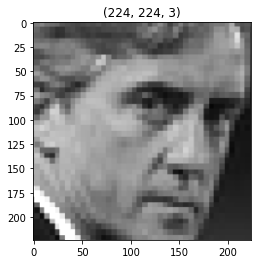

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


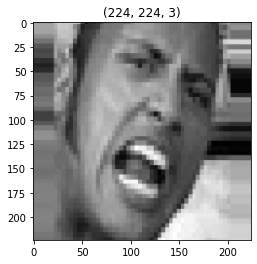

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


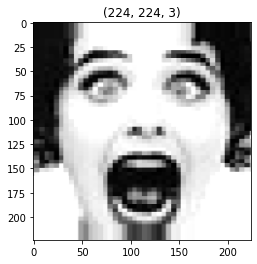

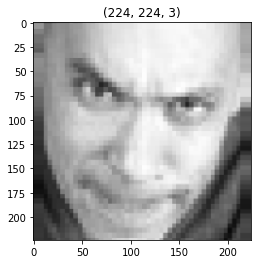

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


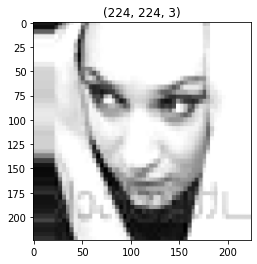

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


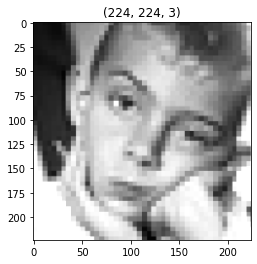

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


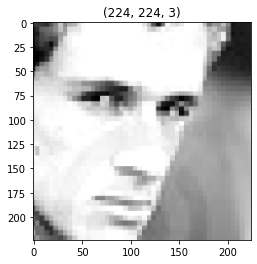

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


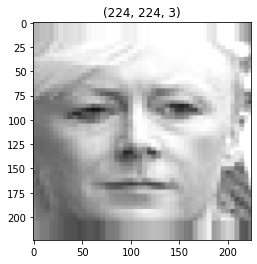

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


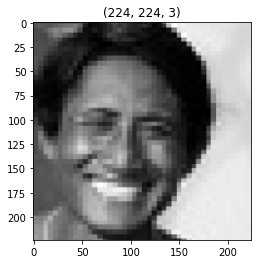

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


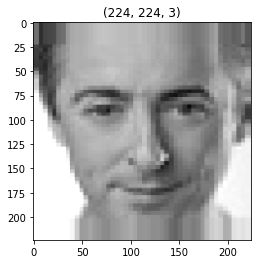

In [ ]:
trained_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for img, l in zip(img_arr, label):
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis = False
    plt.show()

    count +=1
    if count==10:
      break

plotImages(trained_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=5, verbose=1, mode='auto') 

mc = ModelCheckpoint(filepath='fit_model.h5', monitor='val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es,mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 24s 2s/step - loss: 16.4880 - accuracy: 0.2344 - val_loss: 11.8745 - val_accuracy: 0.1914

Epoch 00001: val_accuracy improved from -inf to 0.19141, saving model to fit_model.h5
Epoch 2/50
10/10 [==============================] - 21s 2s/step - loss: 8.4125 - accuracy: 0.2719 - val_loss: 6.6735 - val_accuracy: 0.4180

Epoch 00002: val_accuracy improved from 0.19141 to 0.41797, saving model to fit_model.h5
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 6.1486 - accuracy: 0.3812 - val_loss: 5.1217 - val_accuracy: 0.4062

Epoch 00003: val_accuracy did not improve from 0.41797
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 5.7206 - accuracy: 0.4313 - val_loss: 4.9544 - val_accuracy: 0.4609

Epoch 00004: val_accuracy improved from 0.41797 to 0.46094, saving model to fit_model.h5
Epoch 5/50
10/10 [==============================] - 21s 2s/step - loss: 5.1599 - accuracy: 0.4281 - val_loss: 6.488

In [ ]:
from keras.models import load_model
model = load_model('/content/fit_model.h5')

In [ ]:
history = hist.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

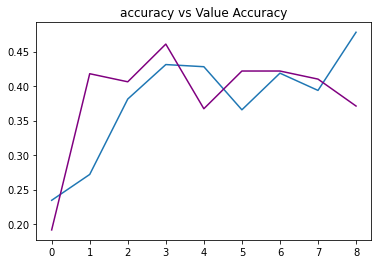

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'], c='purple')
plt.title("accuracy vs Value Accuracy")
plt.show()

No handles with labels found to put in legend.


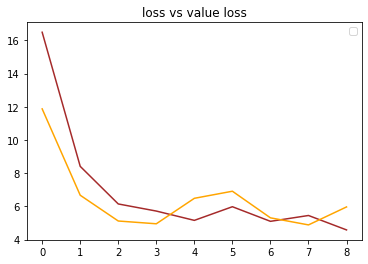

In [ ]:
plt.plot(history['loss'], c='brown')
plt.plot(history['val_loss'], c='orange')
plt.title('loss vs value loss')
plt.legend()
plt.show()

In [ ]:
output = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))


the image is :surprise


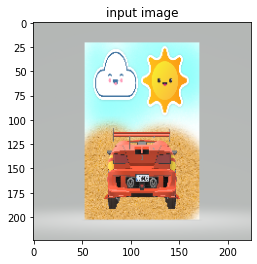

In [ ]:
#final testing

img_path = "/content/screenshot.png"
img = load_img(img_path, target_size=(224,224))

i=img_to_array(img)/255

input_arr =np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"the image is :{output[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()